<a href="https://colab.research.google.com/github/notwarnite/MFDS_Project/blob/main/Grp_4_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename = "data_set.data"

headers = ["symboling","normalized_losses","make","fuel_type","aspiration", "num_of_doors","body_style",
         "drive_wheels","engine_location","wheel_base", "length","width","height","curb_weight","engine_type",
         "num_of_cylinders", "engine_size","fuel_system","bore","stroke","compression_ratio","horsepower",
         "peak_rpm","city_mpg","highway_mpg","price"]

df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    21
-2     3
Name: symboling, dtype: int64

In [ ]:
df.replace("?", np.nan, inplace = True)

In [ ]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].value_counts())
    print(" ")

symboling
 0    67
 1    54
 2    32
 3    27
-1    21
-2     3
Name: symboling, dtype: int64
 
normalized_losses
161    11
91      8
150     7
134     6
104     6
128     6
102     5
65      5
168     5
85      5
94      5
95      5
103     5
118     4
74      4
106     4
122     4
93      4
148     4
83      3
115     3
125     3
137     3
154     3
101     3
87      2
164     2
153     2
110     2
89      2
129     2
194     2
145     2
197     2
188     2
192     2
113     2
81      2
119     2
108     2
158     2
121     1
77      1
90      1
107     1
98      1
78      1
186     1
142     1
256     1
231     1
Name: normalized_losses, dtype: int64
 
make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            10
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu      

In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

symboling
False    204
Name: symboling, dtype: int64
 
normalized_losses
False    163
True      41
Name: normalized_losses, dtype: int64
 
make
False    204
Name: make, dtype: int64
 
fuel_type
False    204
Name: fuel_type, dtype: int64
 
aspiration
False    204
Name: aspiration, dtype: int64
 
num_of_doors
False    202
True       2
Name: num_of_doors, dtype: int64
 
body_style
False    204
Name: body_style, dtype: int64
 
drive_wheels
False    204
Name: drive_wheels, dtype: int64
 
engine_location
False    204
Name: engine_location, dtype: int64
 
wheel_base
False    204
Name: wheel_base, dtype: int64
 
length
False    204
Name: length, dtype: int64
 
width
False    204
Name: width, dtype: int64
 
height
False    204
Name: height, dtype: int64
 
curb_weight
False    204
Name: curb_weight, dtype: int64
 
engine_type
False    204
Name: engine_type, dtype: int64
 
num_of_cylinders
False    204
Name: num_of_cylinders, dtype: int64
 
engine_size
False    204
Name: engine_size, dtype: int64

In [ ]:
avg_norm_loss = df["normalized_losses"].astype("float").mean(axis=0)
print("Average of normalized_losses:", avg_norm_loss)
df["normalized_losses"].replace(np.nan,avg_norm_loss,inplace=True)

Average of normalized_losses: 122.29447852760737


In [ ]:
#replace the missing 'num-of-doors' values by the most frequent
print("Mode of num_of_doors: ",df['num_of_doors'].value_counts().idxmax())
df['num_of_doors'].replace(np.nan,df['num_of_doors'].value_counts().idxmax(),inplace=True)

Mode of num_of_doors:  four


In [ ]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average of Bore Values:",avg_bore)
df["bore"].replace(np.nan,avg_bore,inplace=True)

Average of Bore Values: 3.327500000000001


In [ ]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of Stroke Values:",avg_bore)
df["stroke"].replace(np.nan,avg_stroke,inplace = True)

Average of Stroke Values: 3.327500000000001


In [ ]:
avg_horsepower = df['horsepower'].astype("float").mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.20792079207921


In [ ]:
avg_peakrpm=df['peak_rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak_rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5124.009900990099


In [ ]:
avg_price = df["price"].astype("float").mean(axis=0)
print("Average of Price Values:",avg_price)
df["price"].replace(np.nan,avg_price,inplace = True)

Average of Price Values: 13190.59


In [ ]:
# importing required library
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le1.fit(df.make)
df['make'] = df['make'] = le1.transform(df.make)

le2 = LabelEncoder()
le2.fit(df.fuel_type)
df["fuel_type"] = le2.transform(df.fuel_type)

le3 = LabelEncoder()
le3.fit(df.aspiration)
df['aspiration'] = le3.transform(df.aspiration)

le4 = LabelEncoder()
le4.fit(df.num_of_doors)
df['num_of_doors'] = le4.transform(df.num_of_doors)

le5 = LabelEncoder()
le5.fit(df.body_style)
df['body_style'] = le5.transform(df.body_style)

le6 = LabelEncoder()
le6.fit(df.drive_wheels)
df['drive_wheels'] = le6.transform(df.drive_wheels)

le7 = LabelEncoder()
le7.fit(df.engine_location)
df['engine_location'] = le7.transform(df.engine_location)

le8 = LabelEncoder()
le8.fit(df.fuel_system)
df['fuel_system'] = le8.transform(df.fuel_system)

le9 = LabelEncoder()
le9.fit(df.engine_type)
df['engine_type'] = le9.transform(df.engine_type)

le10 = LabelEncoder()
le10.fit(df.num_of_cylinders)
df['num_of_cylinders'] = le10.transform(df.num_of_cylinders)

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.294,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.294,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.294,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.dtypes

symboling              int64
normalized_losses     object
make                   int64
fuel_type              int64
aspiration             int64
num_of_doors           int64
body_style             int64
drive_wheels           int64
engine_location        int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type            int64
num_of_cylinders       int64
engine_size            int64
fuel_system            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [ ]:
df[["normalized_losses"]] = df[["normalized_losses"]].astype("float")
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["price","horsepower"]] = df[["price","horsepower"]].astype("float")
df[["peak_rpm"]] = df[["peak_rpm"]].astype("int64")

df["make"]=pd.factorize(df.make)[0]
df["fuel_type"]=pd.factorize(df.fuel_type)[0]
df["aspiration"]=pd.factorize(df.aspiration)[0]
df["num_of_doors"]=pd.factorize(df.num_of_doors)[0]
df["body_style"]=pd.factorize(df.body_style)[0]
df["drive_wheels"]=pd.factorize(df.drive_wheels)[0]
df["engine_location"]=pd.factorize(df.engine_location)[0]
df["engine_type"]=pd.factorize(df.engine_type)[0]
df["num_of_cylinders"]=pd.factorize(df.num_of_cylinders)[0]
df["fuel_system"]=pd.factorize(df.fuel_system)[0]

In [ ]:
df.dtypes

symboling              int64
normalized_losses    float64
make                   int64
fuel_type              int64
aspiration             int64
num_of_doors           int64
body_style             int64
drive_wheels           int64
engine_location        int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type            int64
num_of_cylinders       int64
engine_size            int64
fuel_system            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [ ]:
df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.294479,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000,21,27,13495.00
1,3,122.294479,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000,21,27,16500.00
2,1,122.294479,0,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154.0,5000,19,26,16500.00
3,2,164.000000,1,0,0,1,2,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.40,10.0,102.0,5500,24,30,13950.00
4,2,164.000000,1,0,0,1,2,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.40,8.0,115.0,5500,18,22,17450.00
5,2,122.294479,1,0,0,0,2,1,0,99.8,177.3,66.3,53.1,2507,2,2,136,0,3.19,3.40,8.5,110.0,5500,19,25,15250.00
6,1,158.000000,1,0,0,1,2,1,0,105.8,192.7,71.4,55.7,2844,2,2,136,0,3.19,3.40,8.5,110.0,5500,19,25,17710.00
7,1,122.294479,1,0,0,1,3,1,0,105.8,192.7,71.4,55.7,2954,2,2,136,0,3.19,3.40,8.5,110.0,5500,19,25,18920.00
8,1,158.000000,1,0,1,1,2,1,0,105.8,192.7,71.4,55.9,3086,2,2,131,0,3.13,3.40,8.3,140.0,5500,17,20,23875.00
9,0,122.294479,1,0,1,0,1,2,0,99.5,178.2,67.9,52.0,3053,2,2,131,0,3.13,3.40,7.0,160.0,5500,16,22,13190.59


In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from sklearn.preprocessing import StandardScaler
x = (df[df.columns[1:]]).values;
x_n = x
x_scaler = StandardScaler();
x_scaler.fit(x);
x = x_scaler.transform(x)
y = df['symboling'].values + 2;
y = y[:,np.newaxis]
y_en = tf.keras.utils.to_categorical(y,num_classes=6)
print(x.shape)
print(y.shape)
print(y_en.shape)

(204, 25)
(204, 1)
(204, 6)


In [ ]:
x_n[103]

array([1.0800e+02, 1.2000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0040e+02, 1.8460e+02,
       6.6500e+01, 5.5100e+01, 3.0600e+03, 1.0000e+00, 1.0000e+00,
       1.8100e+02, 0.0000e+00, 3.4300e+00, 3.2700e+00, 9.0000e+00,
       1.5200e+02, 5.2000e+03, 1.9000e+01, 2.5000e+01, 1.3499e+04])

In [ ]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.294479,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,122.294479,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,122.294479,0,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164.000000,1,0,0,1,2,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164.000000,1,0,0,1,2,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.40,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.000000,21,0,0,1,2,0,0,109.1,188.8,68.9,55.5,2952,2,0,141,0,3.78,3.15,9.5,114.0,5400,23,28,16845.0
200,-1,95.000000,21,0,1,1,2,0,0,109.1,188.8,68.8,55.5,3049,2,0,141,0,3.78,3.15,8.7,160.0,5300,19,25,19045.0
201,-1,95.000000,21,0,0,1,2,0,0,109.1,188.8,68.9,55.5,3012,1,1,173,0,3.58,2.87,8.8,134.0,5500,18,23,21485.0
202,-1,95.000000,21,1,1,1,2,0,0,109.1,188.8,68.9,55.5,3217,2,1,145,6,3.01,3.40,23.0,106.0,4800,26,27,22470.0


In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.294479,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,122.294479,0,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,122.294479,0,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164.000000,1,0,0,1,2,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164.000000,1,0,0,1,2,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [ ]:
df["make"]=pd.factorize(df.make)[0]
df["fuel_type"]=pd.factorize(df.fuel_type)[0]
df["aspiration"]=pd.factorize(df.aspiration)[0]
df["num_of_doors"]=pd.factorize(df.num_of_doors)[0]
df["body_style"]=pd.factorize(df.body_style)[0]
df["drive_wheels"]=pd.factorize(df.drive_wheels)[0]
df["engine_location"]=pd.factorize(df.engine_location)[0]
df["engine_type"]=pd.factorize(df.engine_type)[0]
df["num_of_cylinders"]=pd.factorize(df.num_of_cylinders)[0]
df["fuel_system"]=pd.factorize(df.fuel_system)[0]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  204 non-null    float64
 2   make               204 non-null    int64  
 3   fuel_type          204 non-null    int64  
 4   aspiration         204 non-null    int64  
 5   num_of_doors       204 non-null    int64  
 6   body_style         204 non-null    int64  
 7   drive_wheels       204 non-null    int64  
 8   engine_location    204 non-null    int64  
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    int64  
 15  num_of_cylinders   204 non-null    int64  
 16  engine_size        204 non

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_en,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(163, 25)
(163, 6)
(41, 25)
(41, 6)


In [ ]:
model=tf.keras.Sequential([
    tfl.Dense(26, activation='relu',input_shape = (x_train.shape[1],)),
    tfl.Dense(16, activation='relu'),
    tfl.Dense(6,activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005),loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 26)                676       
                                                                 
 dense_37 (Dense)            (None, 16)                432       
                                                                 
 dense_38 (Dense)            (None, 6)                 102       
                                                                 
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs=150
history=model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    epochs=epochs
)

Epoch 1/150
6/6 [==============================] - 1s 36ms/step - loss: 2.0779 - accuracy: 0.1840 - val_loss: 2.0083 - val_accuracy: 0.1707
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 2.0094 - accuracy: 0.1963 - val_loss: 1.9463 - val_accuracy: 0.1707
Epoch 3/150
6/6 [==============================] - 0s 8ms/step - loss: 1.9543 - accuracy: 0.2331 - val_loss: 1.8858 - val_accuracy: 0.2683
Epoch 4/150
6/6 [==============================] - 0s 6ms/step - loss: 1.9047 - accuracy: 0.2331 - val_loss: 1.8299 - val_accuracy: 0.2927
Epoch 5/150
6/6 [==============================] - 0s 7ms/step - loss: 1.8595 - accuracy: 0.2515 - val_loss: 1.7787 - val_accuracy: 0.3171
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 1.8188 - accuracy: 0.2638 - val_loss: 1.7324 - val_accuracy: 0.3171
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 1.7814 - accuracy: 0.2822 - val_loss: 1.6909 - val_accuracy: 0.3171
Epoch 8/150
6/6 [=========

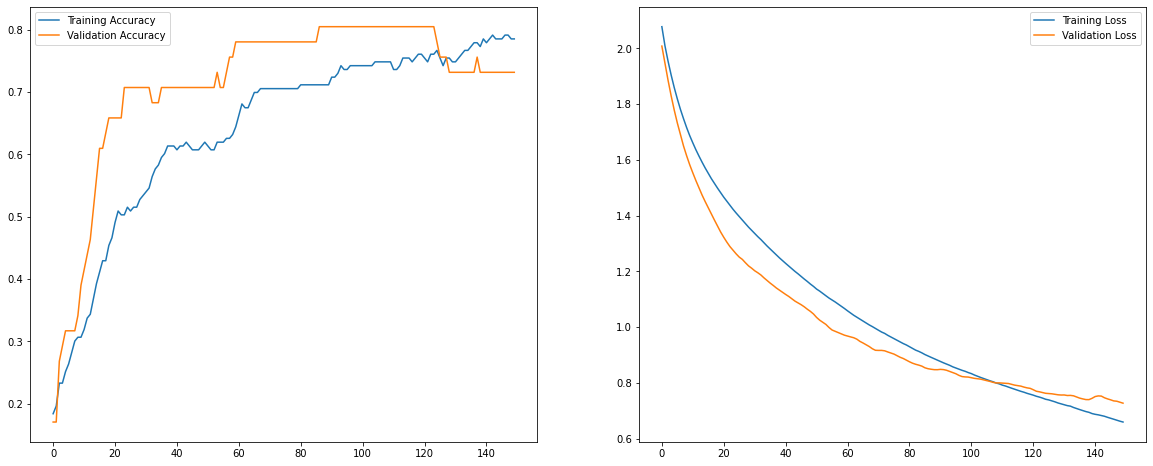

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
path2 = 'data_point.txt'
data_point = pd.read_csv(path2,header=None)

data_point[1] = le1.transform(data_point[1])
data_point[2] = le2.transform(data_point[2])
data_point[3] = le3.transform(data_point[3])
data_point[4] = le4.transform(data_point[4])
data_point[5] = le5.transform(data_point[5])
data_point[6] = le6.transform(data_point[6])
data_point[7] = le7.transform(data_point[7])
data_point[16] = le8.transform(data_point[16])
data_point[13] = le9.transform(data_point[13])
data_point[14] = le10.transform(data_point[14])

In [ ]:
x_pred = data_point[:].values
x_pred = x_scaler.transform(x_pred)

In [ ]:
out_label = model.predict(x_pred)
print(out_label)
print('Predicted Class', list(out_label[0]).index(max(out_label[0])) - 2)

[[0.06572453 0.5332021  0.24539702 0.09649444 0.04515985 0.01402197]]
Predicted Class -1


In [ ]:
model_l1=tf.keras.Sequential([
    tfl.Dense(26, activation='relu',input_shape = (x_train.shape[1],), kernel_regularizer = tf.keras.regularizers.L1(0.0005)),
    tfl.Dense(16, activation='relu', kernel_regularizer = tf.keras.regularizers.L1(0.0005)),
    tfl.Dense(6,activation='softmax')
])

model_l1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),loss="categorical_crossentropy",metrics=['accuracy'])
model_l1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 26)                676       
                                                                 
 dense_49 (Dense)            (None, 16)                432       
                                                                 
 dense_50 (Dense)            (None, 6)                 102       
                                                                 
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs=150
history=model_l1.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    epochs=epochs
)

Epoch 1/150
6/6 [==============================] - 1s 38ms/step - loss: 1.8420 - accuracy: 0.3497 - val_loss: 1.8160 - val_accuracy: 0.3902
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 1.7830 - accuracy: 0.3804 - val_loss: 1.7768 - val_accuracy: 0.3415
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 1.7390 - accuracy: 0.3804 - val_loss: 1.7389 - val_accuracy: 0.3659
Epoch 4/150
6/6 [==============================] - 0s 6ms/step - loss: 1.7014 - accuracy: 0.3988 - val_loss: 1.7046 - val_accuracy: 0.4146
Epoch 5/150
6/6 [==============================] - 0s 8ms/step - loss: 1.6627 - accuracy: 0.4601 - val_loss: 1.6709 - val_accuracy: 0.4146
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 1.6271 - accuracy: 0.4601 - val_loss: 1.6345 - val_accuracy: 0.4634
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 1.5949 - accuracy: 0.4724 - val_loss: 1.6000 - val_accuracy: 0.4634
Epoch 8/150
6/6 [=========

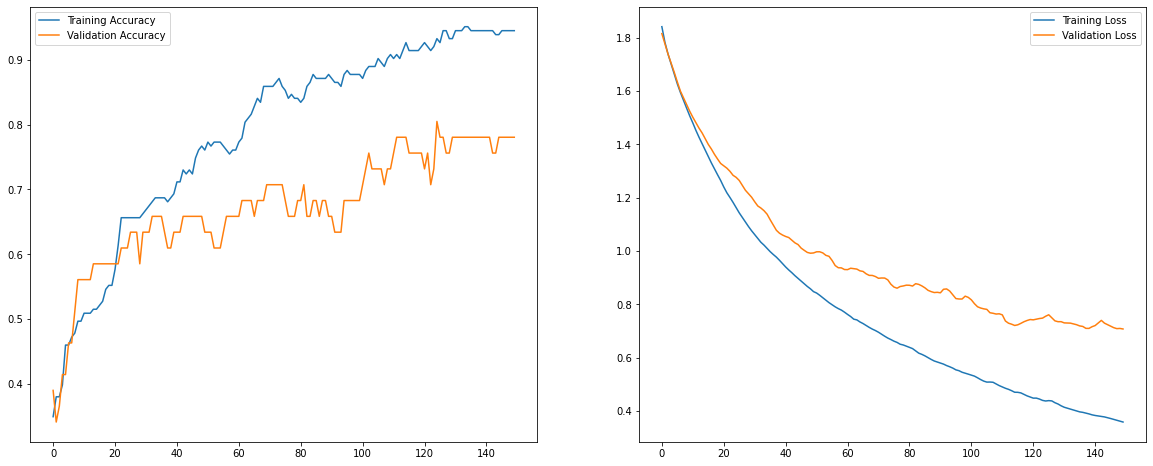

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
out_label_l1 = model_l1.predict(x_pred)
print(out_label_l1)
print('Predicted Class', list(out_label_l1[0]).index(max(out_label_l1[0])) - 2)

[[0.08344092 0.36243007 0.2508742  0.12237759 0.1511216  0.0297556 ]]
Predicted Class -1
